In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
def epsilon(nu,ep_inf,ep_s,nu_to,Gamma,nu_p,gamma):

    return ep_inf+(ep_s-ep_inf)*nu_to**2/(nu_to**2-nu**2-1j*nu*Gamma)-nu_p**2/(nu**2+1j*nu*gamma)

def T_crit(T,a,Tcrit):

    return a*(T-Tcrit)**0.5

def epsilonboth(nu,ep_inf,ep_s,nu_to,Gamma,nu_p,gamma):
    N = len(nu)
    nu_real = nu[:N//2]
    nu_imag = nu[N//2:]
    y_real = np.real(epsilon(nu_real, ep_inf,ep_s,nu_to,Gamma,nu_p,gamma))
    y_imag = np.imag(epsilon(nu_imag, ep_inf,ep_s,nu_to,Gamma,nu_p,gamma))
    return np.hstack([y_real, y_imag])

def FourierT(f):
    N=int(2**12)
    return np.conj(sp.fft.fft(f.values,n=N))

c = 0.299792458 # speed of light mm/ps


# Función para extraer la temperatura del nombre del archivo
def extraer_temperatura(nombre_archivo):
    match = re.search(r'(\d+\.\d+|\d+)K', nombre_archivo)
    if match:
        return float(match.group(1))
    else:
        return None
    
def extraer_temperatura2(nombre_archivo):
    # Buscar un patrón de temperatura (número seguido de 'K')
    match = re.search(r'(\d+)K', nombre_archivo)
    if match:
        return int(match.group(1))
    else:
        return float('inf')  # Colocar archivos sin temperatura al final
    
def convert_dats(carpeta):
    nueva_carpeta = os.path.join(carpeta, 'carpeta1')
    os.makedirs(nueva_carpeta, exist_ok=True)
    
    archivos = [archivo for archivo in os.listdir(carpeta) if archivo.endswith('.dat')]
    
    # Agrupar archivos por temperatura
    archivos_por_temp = {}
    for archivo in archivos:
        temp = extraer_temperatura(archivo)
        if temp is not None:
            archivos_por_temp.setdefault(temp, []).append(archivo)

    # Procesar archivos por cada temperatura
    for temp, lista_archivos in archivos_por_temp.items():
        try:
            # Inicializar variables de acumulación
            suma_col1 = None
            suma_col2 = None
            n_archivos = len(lista_archivos)
            
            # Iterar sobre los archivos con la misma temperatura
            for archivo in lista_archivos:
                df = pd.read_csv(os.path.join(carpeta, archivo), delim_whitespace=True)
                
                # Acumular las columnas
                if suma_col1 is None:
                    suma_col1 = df['pos']
                    suma_col2 = df['X']
                else:
                    suma_col1 += df['pos']
                    suma_col2 += df['X']
            
            # Calcular el promedio
            promedio_col1 = suma_col1 / n_archivos * (2/c)
            promedio_col2 = suma_col2 / n_archivos
            
            # Crear un DataFrame con los promedios
            df_promedio = pd.DataFrame({'pos': promedio_col1, 'X': promedio_col2})
            
            # Guardar el archivo resultante en la nueva carpeta
            archivo_salida = os.path.join(nueva_carpeta, f'Average_{temp}K.dat')
            df_promedio.to_csv(archivo_salida, index=False, sep=' ')
            print(f"Archivo {archivo_salida} generado en {nueva_carpeta}.")
        
        except Exception as e:
            print(f"Error al procesar los archivos con temperatura {temp}: {e}")


# Proccesing reference data

In [4]:
carpeta_ref = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\Data_SnTe\Data_SnTe\subs'
nueva_carpeta_ref = os.path.join(carpeta_ref, 'carpeta_ref1')
os.makedirs(nueva_carpeta_ref, exist_ok=True)
archivos = [archivo for archivo in os.listdir(carpeta_ref) if archivo.endswith('.dat')]
temp = '300'
# Procesar archivos por cada temperatura

try:
    # Inicializar variables de acumulación
    suma_col1 = None
    suma_col2 = None

    n_archivos = len(archivos)
    
    # Iterar sobre los archivos con la misma temperatura
    for archivo in archivos:

        df = pd.read_csv(os.path.join(carpeta_ref, archivo), delim_whitespace=True)
        # Acumular las columnas
        if suma_col1 is None:

            suma_col1 = df['pos']
            suma_col2 = df['X']
            
        else:
            
            suma_col1 += df['pos']
            suma_col2 += df['X']

    # Calcular el promedio
    promedio_col1 = suma_col1 / n_archivos * (2/c)
    promedio_col2 = suma_col2 / n_archivos
    
    # Crear un DataFrame con los promedios
    df_promedio = pd.DataFrame({'pos': promedio_col1, 'X': promedio_col2})
    
    # Guardar el archivo resultante en la nueva carpeta
    archivo_salida = os.path.join(nueva_carpeta_ref, f'Average_{temp}K.dat')
    df_promedio.to_csv(archivo_salida, index=False, sep=' ')
    print(f"Archivo {archivo_salida} generado en {nueva_carpeta_ref}.")

except Exception as e:
        print(f"Error al procesar los archivos con temperatura {temp}: {e}")

Error al procesar los archivos con temperatura 300: unsupported operand type(s) for /: 'NoneType' and 'int'


In [5]:
carpeta = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\Data_SnTe\Data_SnTe\spls'

convert_dats(carpeta)

In [6]:
carpeta = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\Data_SnTe\Data_SnTe\spls'

archivos = [archivo for archivo in os.listdir(carpeta) if archivo.endswith('.dat')]


archivos_por_temp = {}
for archivo in archivos:
    temp = extraer_temperatura(archivo)
    if temp is not None:
        archivos_por_temp.setdefault(temp, []).append(archivo)
        

n = 1
kie = sorted(list(archivos_por_temp.keys()))
arc = archivos_por_temp[kie[n]]
print(arc)
sx = np.zeros(601)
sy = np.zeros(601)

for j in arc:
    df = pd.read_csv(os.path.join(carpeta, j), delim_whitespace=True)
    x = np.array(df['pos'])*2/c
    y = np.array(df['X'])
    sx+=x
    sy+=y

   

df1 = pd.read_csv(os.path.join(path_analisis,archivos_ordenados_s[n]), delim_whitespace=True)
x1 = np.array(df1['pos'])
y1 = np.array(df1['X'])
# n = 3
# archivo = archivos[n]

# df = pd.read_csv(os.path.join(carpeta, archivo), delim_whitespace=True)
# x = df['pos']
# y = df['X']

plt.plot(sx/3,sy/3)
plt.plot(x1,y1,'*')

IndexError: list index out of range

In [7]:
path_analisis =rf'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\Data_SnTe\Data_SnTe\spls\carpeta1'
path_analisis_ref = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\Data_SnTe\Data_SnTe\subs\carpeta_ref1'

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

In [8]:
archivos_ordenados_s

[]

In [9]:
bis = [0.02,0.03,0.06,0.07,0.1,0.15]
ds = np.array([0.489,0.586,0.519,0.847,0.511,0.461])  #ds = np.array([0.489,0.566,0.509,0.832,0.491,0.431])
ds = ds - 0.360
colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))


In [10]:
def anim2(n0,n1,n2,index):
    
    f = plt.figure(figsize=(10, 5),dpi=200)

    global nk0, nk1, nk2
    nk0 = n0
    nk1 = n1
    nk2 = n2
    df1 = pd.read_csv(os.path.join(path_analisis,archivos_ordenados_s[int(index)]), delim_whitespace=True)
    df1 = df1.loc[(df1.iloc[:, 0] >= n0) & (df1.iloc[:, 0] <=n1)]


    f = plt.figure(figsize=(10,4))


    plt.subplot(121)

    plt.title('$Signal_{Sample}$')
    plt.plot(df1['pos'],df1['X'],label= str(bis[int(index)])+' %' )
    plt.xlabel('time [ps]')
    #plt.plot(df1['pos'],df1['X'],'o')
    plt.legend()

    d = pd.read_csv(os.path.join(path_analisis_ref ,archivos_ordenados_ref[0]), delim_whitespace=True)
    d = d.loc[(d.iloc[:, 0] >= n0) & (d.iloc[:, 0] <= n2)]

    plt.subplot(122)

    plt.plot(d['pos'],d['X'],label= str(extraer_temperatura2(archivos_ordenados_s[int(index)]))+' K')
    plt.title('$Signal_{ref}$')
    plt.xlabel('time [ps]')
    #plt.plot(d['pos'],d['X'],'o')
    plt.legend()

    
    

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        n0= widgets.FloatSlider(min=370,max=500,value=374.100,step=0.1,**opc),
        n1= widgets.FloatSlider(min=300,max=500,value=384.500,step=0.1,**opc),
        n2= widgets.FloatSlider(min=300,max=500,value=381.6900,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=6,step=1,**opc)
        #mm
        )

TraitError: setting max < min

In [11]:
c

0.299792458

In [12]:
# Leer los archivos .dat
f = plt.figure(figsize=(18,10))
permitivadade = []
for i,j in enumerate(archivos_ordenados_s):

    try:

        df1 = pd.read_csv(os.path.join(path_analisis,j), delim_whitespace=True)
        df1 = df1.loc[(df1.iloc[:, 0] >=  nk0) & (df1.iloc[:, 0] <=nk1)]
        df1_ref = pd.read_csv(os.path.join(path_analisis_ref,archivos_ordenados_ref[0]), delim_whitespace=True)
        df1_ref  = df1_ref .loc[(df1_ref .iloc[:, 0] >= nk0) & (df1_ref .iloc[:, 0] <=nk2)]
        # plt.subplot(131)

        # plt.plot(df1['pos'],df1['X'],label=  extraer_temperatura2(j))
        # plt.plot(df1_ref['pos'],df1_ref['X'])
        # plt.legend()
        
        
        # ind = 150

        y = df1['X']
        y_ref = df1_ref['X']

        x = df1['pos']
        
        x_ref = df1_ref['pos']

        k = 25
        nu = sp.fft.fftfreq(2**12,1/30)
        #y = sp.fft.fftfreq(2**14,1/30)
        y = FourierT(y)[1:len(nu)//k]
        y_ref = FourierT(y_ref)[1:len(nu)//k]
        nu = nu[1:len(nu)//k]
        xmin,xmax = 0.1, 1.25
        mask = (nu >= xmin) & (nu <= xmax)
        nu = nu[mask]
        y = y[mask]
        y_ref = y_ref[mask]

        plt.subplot(221)

        plt.plot(nu ,np.abs(y),label= '% Bi = '+str(bis[i]),color = colors[i])
        plt.title('Real fourier transform')
        # plt.xlabel(r'$\nu$ [THz]',fontsize=15)
        plt.yscale('log')
        plt.legend()

        plt.subplot(222)

        plt.plot(nu[(nu >= 0.1) & (nu <= 0.5)],np.unwrap(np.angle(y),period = 0.5*np.pi)[(nu >= 0.1) & (nu <= 0.5)],color = colors[i])
        plt.title('$Phase$')
        #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
        # plt.xlim(0.1,0.6)
        #plt.yscale('log')
        #plt.legend()


        # k = 15
        
        #nu = nu[1:len(nu)//k]
    
        plt.subplot(223)
        
        # nu = sp.fft.fftfreq(2**14,1/30)
        # y = FourierT(y)[1:len(nu)//k]
        # y_ref = FourierT(y_ref)[1:len(nu)//k]
        # nu = nu[1:len(nu)//k]
        # xmin,xmax = 0.15, 1.25
        # mask = (nu >= xmin) & (nu <= xmax)
        # nu = nu[mask]
        # y = y[mask]
        # y_ref = y_ref[mask]

        T = (y/y_ref)*np.exp(2*np.pi*1j*nu/c*(1-2.6)*ds[i]) #delta_ls[sample])
        n = 2.6
        ep =1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu*0.0003)-n
        # Ajustar ds[i] hasta que la parte imaginaria de ep sea positiva
        # while True:
        #     T = (y/y_ref)*np.exp(2*np.pi*1j*nu/c*(1-2.6)*ds[i]) #delta_ls[sample])
        #     ep = 1j * (1+n) * ((1/T)-1) * c / (2*np.pi*nu*0.0003) - n
        #     if np.all(np.imag(ep) > 0):
        #         break  # Si la parte imaginaria es positiva, salimos del bucle
        #     # Aumentar ds[i] ligeramente
        #     ds[i] += 0.0001  # Incremento pequeño, ajustable según sea necesario

        # Imprimir el valor final de ds[i] y el aumento porcentual
        incremento_porcentual = ((ds[i] - ds[i-1]) / ds[i-1]) * 100 if i > 0 else None
        print(f"Nuevo valor de ds[{i}] = {ds[i]}")
        #print(f"Aumento porcentual: {incremento_porcentual:.4f}%")
        permitivadade.append(ep)

        # plt.plot(nu,T,label= ds[i],color = colors[i])
        
        plt.plot(nu,np.imag(ep),label= '% Bi = '+str(bis[i]),color = colors[i])
        #plt.plot(nu,np.imag(ep_real(nu,*opimized_params)))
        plt.ylabel('$\epsilon_{IM}$',fontsize=20)
        plt.legend()
        plt.xlabel(r'$\nu$ [THz]',fontsize=15)
        #plt.xlim(0.15,1.25)
        # plt.ylim(-2000,35000)

        plt.subplot(224)
        #plt.plot(nu,abs(y),label=  extraer_temperatura(j))
        plt.plot(nu,np.real(ep),label= '% Bi = '+str(bis[i]),color = colors[i])
        #plt.plot(nu,np.imag(ep_real(nu,*optimized_params)))
        # plt.xlim(0.15,1.25)
        plt.ylabel('$\epsilon_{REAL}$',fontsize=20)
        plt.xlabel(r'$\nu$ [THz]',fontsize=15)
        # plt.ylim(-15000,15000)
        # #plt.yscale('log')<
        plt.legend()
    except f as Exception:
        print(1)

<Figure size 1800x1000 with 0 Axes>

# New functions analisis

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
sample = "24001"

carpeta = rf'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\{sample}\{sample}'

carpeta_ref = rf'C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\{sample}\Subs'

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))


archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')



warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
N = 2 # Variable para agrupar datos de temperatura

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1\Average_9.8K.dat generado en C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1.
Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1\Average_11.5K.dat generado en C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1.
Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1\Average_14.8K.dat generado en C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1.
Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1\Average_16.3K.dat generado en C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1.
Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1\Average_20.15K.dat generado en C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\carpeta1.
Archivo C:\Users\usuario_trabajo\Desktop\physics\TESIS\SnTe\24001\24001\car

In [16]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

In [17]:
colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]


In [18]:
# sample = "20-20"
d = 0.0003

bis = [0.02,0.03,0.06,0.07,0.1,0.15]

delta_ls = {"24000": 0.489- 0.360, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
"24001":   0.566- 0.360,
"24002":    0.509- 0.360,
"24003":   0.832 - 0.360,
"24004":  0.491 - 0.360, 
"24005":  0.431- 0.360,
"24006": 0.568 - 0.360}  # SINN BISMUTO.

colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))

In [19]:
def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))


In [20]:
os.path.join(path_analisis,archivos_ordenados_s[0])

'C:\\Users\\usuario_trabajo\\Desktop\\physics\\TESIS\\SnTe\\24001\\24001\\carpeta1\\Average_9.8K.dat'

In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(14, 15),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    params_window = ['gaussian', desv]
   # params_window = ['flattop']
    #params_window = ['barthann']


    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    # Datos substrate
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)


    plt.subplot(321)
    plt.plot(x,y/max(y),'k',label='without window')
    plt.plot(x,ventana,'r',label='window')
    plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title('Signal')
    plt.legend()

    plt.subplot(322)
    plt.plot(x_ref,y_ref/max(y_ref),'k',label='without window')
    plt.plot(x,ventana,'r',label='window')
    plt.plot(x,y_subs_ventana/max(y_subs_ventana),'o',color = colors[int(index)],label='Substrate + window')
    plt.xlabel('t [ps]')
    plt.title('Reference')
    plt.legend()
    
    
    

    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
   
    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]


    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr
    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(323)
    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)), label='FFT signal with window',color = colors[int(index)])
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'k',label='without window ')
    plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    plt.ylabel('Fourier Transform',fontsize=15)
    #plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(324)
    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[int(index)])
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'k',label='without window ')
    plt.yscale('log')
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()



    plt.subplot(325)
    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K',color = colors[int(index)])
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'k',label='without window '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$',fontsize=15)
    plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()


    plt.subplot(326)
    plt.plot(nu_filtradas, np.real(ep_con)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K',color = colors[int(index)])
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'k',label='without window ')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$',fontsize=15)
    plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=371.500,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=407.500,step=0.01,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=407.500,step=0.01,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=6,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=-0.021,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=100,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=371.5, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

<Figure size 2800x3000 with 0 Axes>

In [52]:
#plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"#"dejavuserif" 
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 15; plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15; plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 25; plt.rcParams['ytick.labelsize'] = 20 # Tamanho da fonte dos números do eixo y
plt.rcParams['svg.fonttype'] = 'none'

Average_293.8K.dat
Average_231.2K.dat
Average_164.6K.dat
Average_122.8K.dat
Average_108.5K.dat
Average_94.1K.dat
Average_80.1K.dat
Average_66.8K.dat
Average_52.1K.dat
Average_38.3K.dat
Average_20.15K.dat


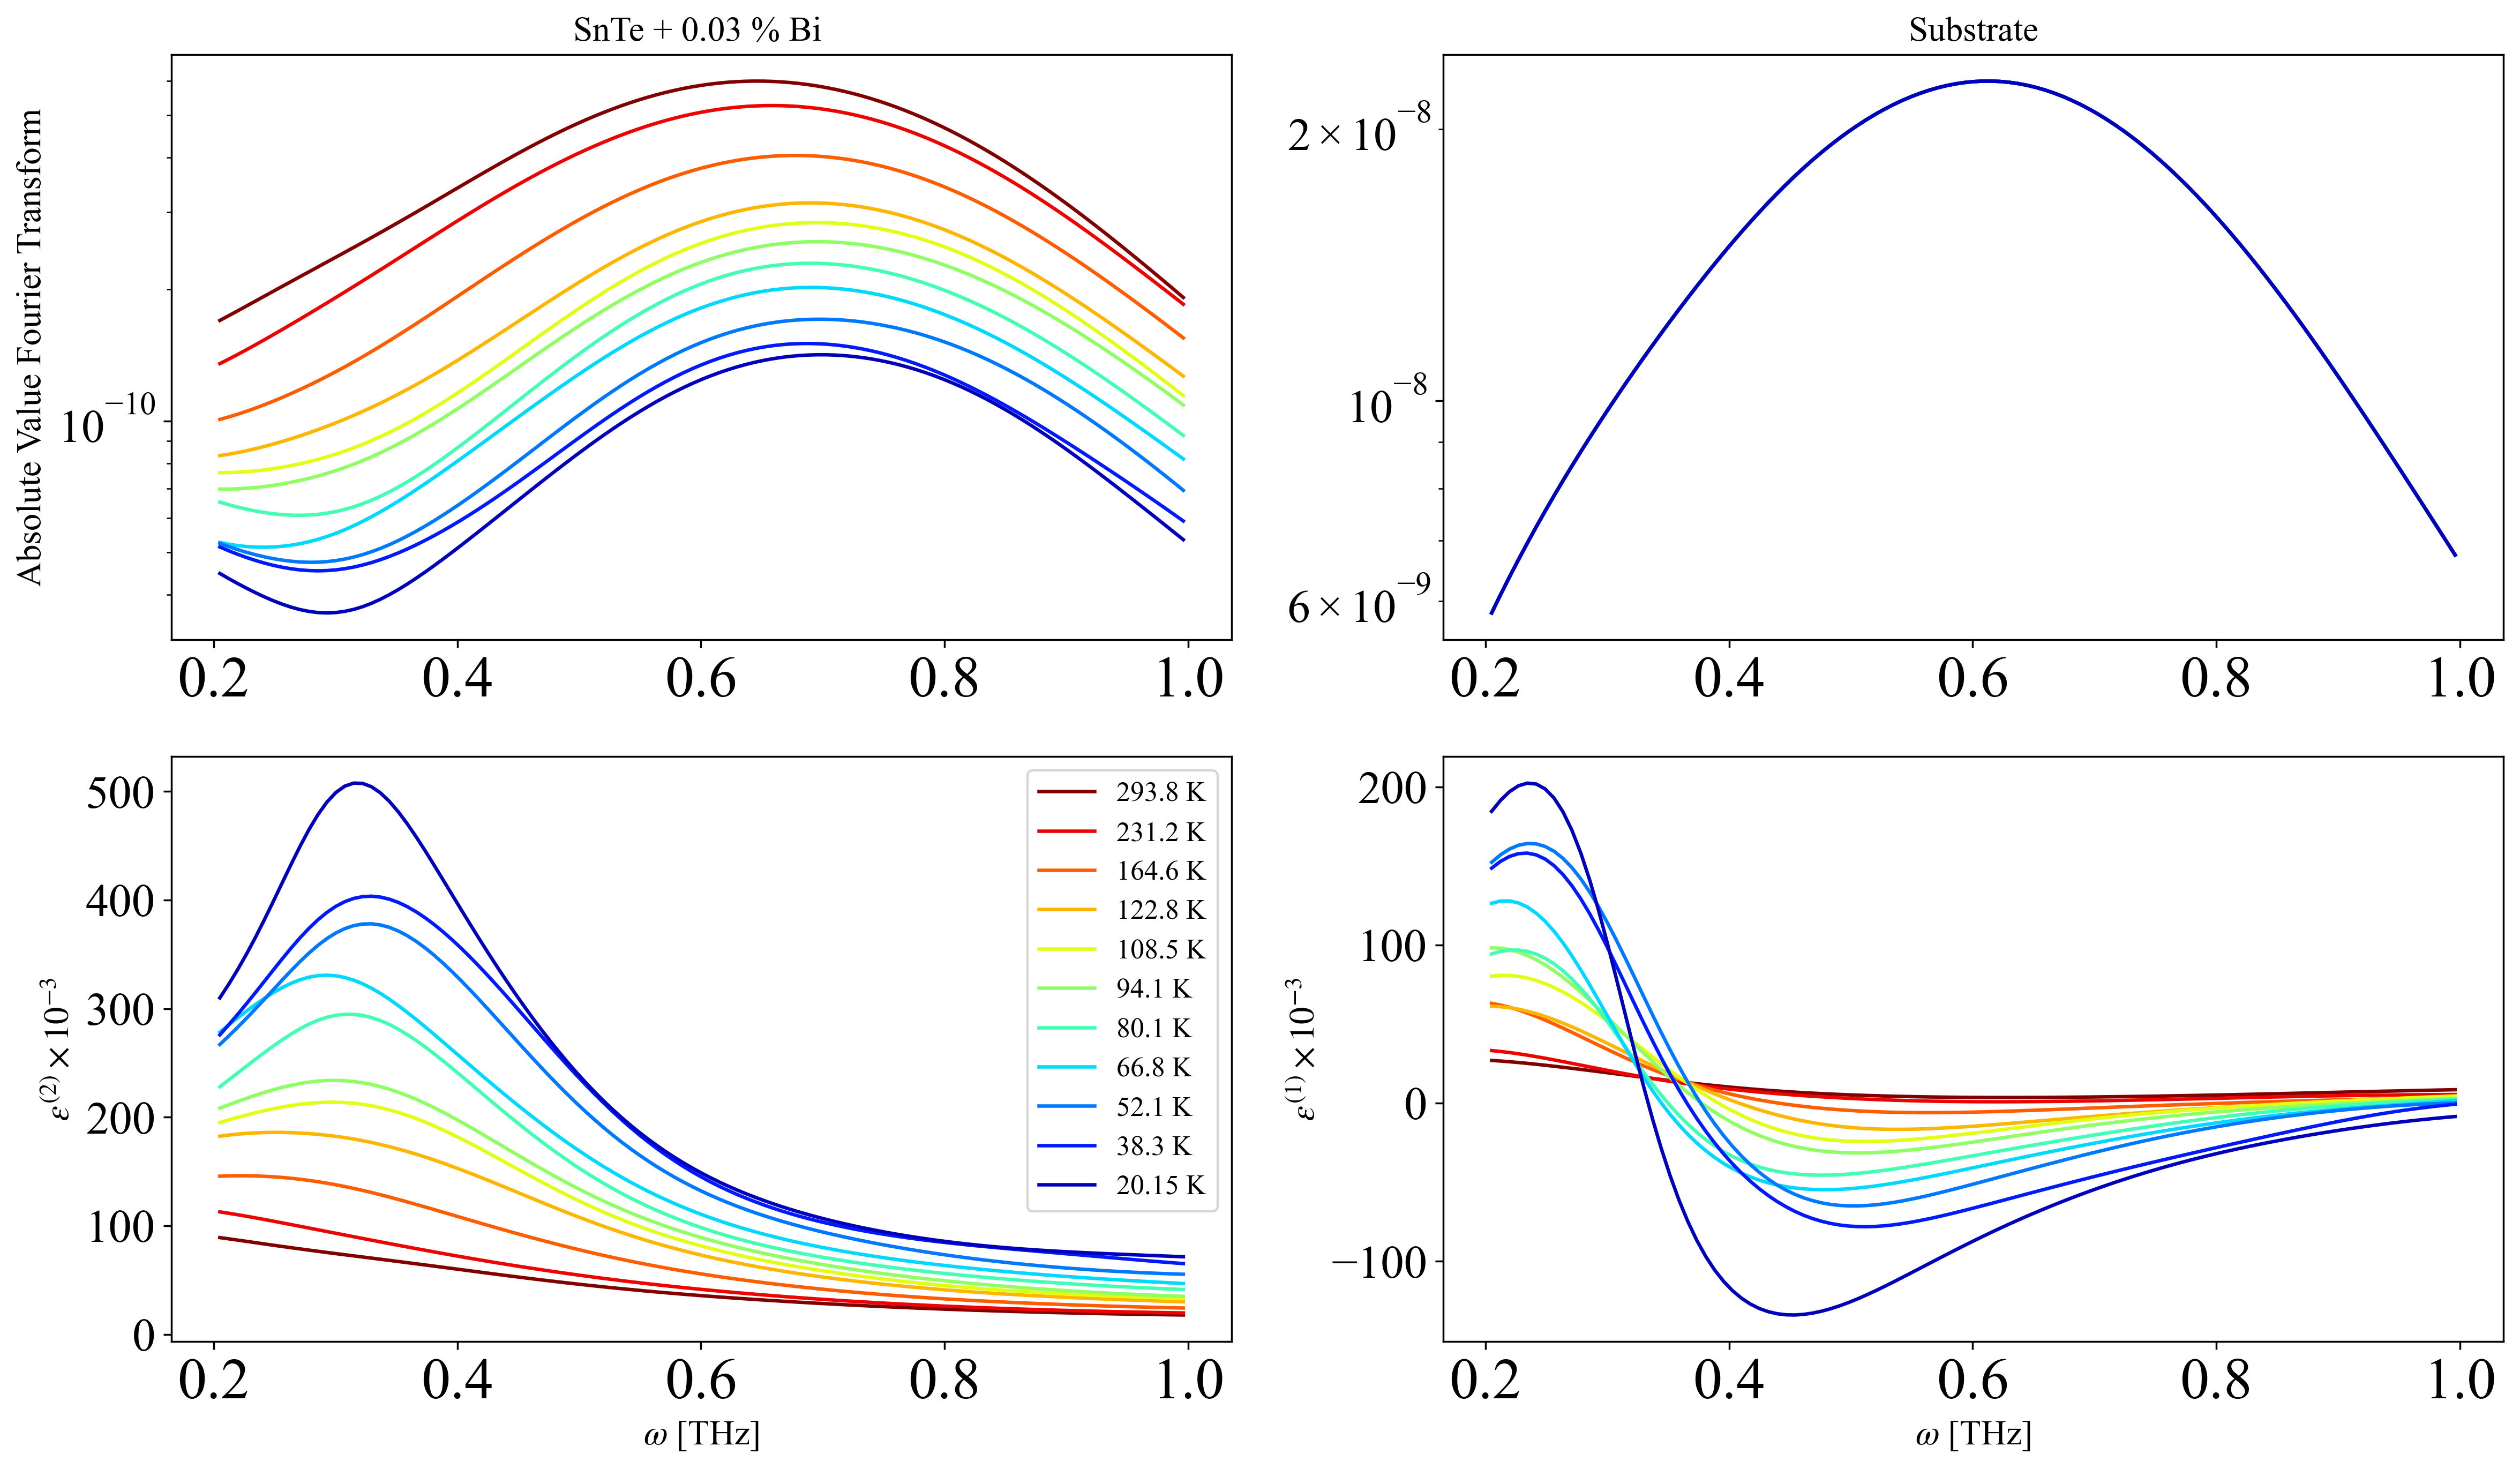

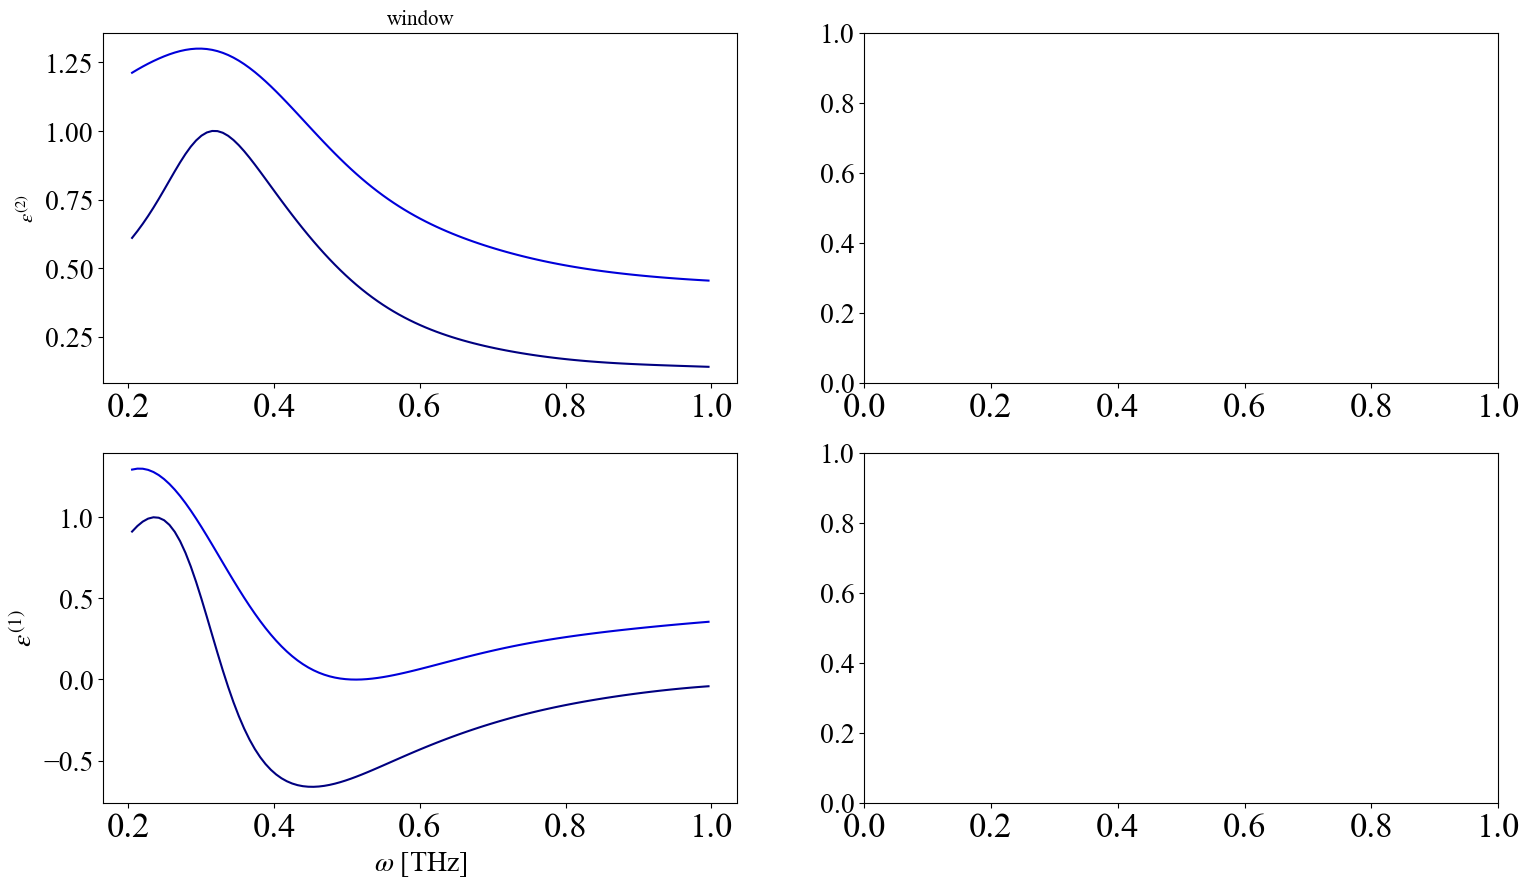

In [65]:
# Leer los archivos .dat
# f = plt.figure(figsize=(15,13))
permitividade_window = []
permitividade = []
temps = []
N = 2**12

fig = plt.figure(figsize=(18, 10),dpi = 312)
p = 7

for i in range(0, len(archivos_ordenados_s), p):

    j = archivos_ordenados_s[::-1][i]
    print(j)
    path_signal = os.path.join(path_analisis,j)
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[0])
    temps.append(extraer_temperatura(path_signal))
    params_window = ['gaussian', 46.78]
    #params_window = ['barthann']
    x,y = getFilterdata(path_signal,nk1,nk0)
    x_ref,y_ref = getFilterdata(path_ref,nk2,nk0)
   
    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,nk0,nk1,nk2,params_window)
    # Datos substrate
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    
    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada =  FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada =  FourierT2(y_subs_ventana,N)[1:len(nu)//k]
    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]


    # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]
    fft_y_signal = fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]

    
    # phase = idx_max_signal-idx_max_substrate

    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    
    permitividade_window.append(ep_con)
    permitividade.append(ep_sin)


    plt.subplot(221)
    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada), label='FFT SIGNAL',color = colors[i])
    plt.ylabel('Absolute Value Fourier Transform')
    plt.yscale('log')
    plt.title(f'SnTe + {0.03} % Bi ')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    #plt.legend()

    plt.subplot(222)
    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada), label='FFT SUBSTRATE',color = colors[i])
    plt.title('Substrate')
    plt.yscale('log')
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    # plt.legend()



    plt.subplot(223)
    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, label=str(extraer_temperatura(j))+' K',color = colors[i])
    
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    plt.legend()
# 

    plt.subplot(224)
    plt.plot(nu_filtradas, np.real(ep_con)*1e-3, label='with window '+str(extraer_temperatura(archivos_ordenados_s[i]))+' K',color = colors[i])
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    #plt.legend()


fig, (ax1, ax2) = plt.subplots(2,2,figsize=(18, 10))
offset = 0.3  # Desplazamiento vertical entre las curvas
cont = 0
for i in range(1,len(permitividade_window),6):
    ep_window = permitividade_window[-i]
    ep = permitividade[-i]
    ax1[0].plot(nu_filtradas, np.imag(ep_window)/max(np.imag(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax1[0].set_ylabel(r'$\epsilon^{(2)}$')
    ax1[0].set_title('window')

    # ax1[1].plot(nu_filtradas, np.imag(ep)/max(np.imag(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    # ax1[1].set_title('without window')
    # #ax2.set_ylabel(r'$\epsilon^{(2)}$',fontsize=20)
    #ax1.set_title('Sample: '+sample)
    ax2[0].plot(nu_filtradas, np.real(ep_window)/max(np.real(ep_window)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
    ax2[0].set_ylabel(r'$\epsilon^{(1)}$',fontsize=20)
    ax2[0].set_xlabel(r'$\omega$ [THz]',fontsize=20)
#     #ax2.set_title('Sample: '+sample)
#     ax2[1].plot(nu_filtradas, np.real(ep)/max(np.real(ep)) + cont * offset, color=colors[-i], label=f'T: {round(temps[-i],3)} K')
#     ax2[1].set_xlabel(r'$\omega$ [THz]',fontsize=20)
#    # plt.legend(loc='upper right')
    cont+=1